# Versuch 255: Röntgenspektrometer

## Auswertung der Messergebnisse

In [1]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2

#Plot settings
plt.style.use('classic')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

In [2]:
#Verwendete Fit-Funktionen
def linear(x,a,b):
    return a*x+b

def gaussian(x, A, mu, sig, y0):
    return y0 + (A*np.exp(-(x-mu)**2/(2*sig**2)))

#Berücksichtung des Untergrunds
def gauß_optimiert(x, a, c, A1, mu1, sig1, A2, mu2, sig2):
    return linear(x, a, c)+gaussian(x, A1, mu1, sig1, 0)+gaussian(x, A2, mu2, sig2, 0)

### Teil 1: Messung des Röntgensprektrums mit einem LiF-Kristall

#### a) Bestimmung der Grenzwellenlänge $\lambda_{gr}$ und der Planck-Konstante $h$

In [3]:
#Importieren der Messdaten der ersten Messung
beta1, counts1=np.loadtxt('Messdaten/V255Messdaten_LiF1.txt',skiprows=1, usecols=(0,1), unpack=True)
beta1=beta1*(2*np.pi/360)

#statistischer Fehler der Zählrate
counts1_err=np.sqrt(counts1)/np.sqrt(5)

In [4]:
#Fit der Messwerte

#Anstieg
popt1,pcov1=curve_fit(linear,beta1[10:15],counts1[10:15],sigma=counts1_err[10:15])
#Untergrund
popt2,pcov2=curve_fit(linear,beta1[:9],counts1[:9],sigma=counts1_err[:9])

#Schnittpunkt der beiden Geraden ergibt beta0
beta0=(popt2[1]-popt1[1])/(popt1[0]-popt2[0])
beta0_err=np.sqrt(pcov2[1,1]/(popt1[0]-popt2[0])**2+pcov1[1,1]/(popt1[0]-popt2[0])**2+((popt2[1]-popt1[1])*pcov1[0,0]**0.5/(popt1[0]-popt2[0])**2)**2+((popt2[1]-popt1[1])*pcov2[0,0]**0.5/(popt1[0]-popt2[0])**2)**2)


print('Für den Schnittpunkt der beiden Geraden und damit beta0 folgt:')
print('beta0 = ' + str(beta0) + ' +/- ' + str(beta0_err) + ' rad')

Für den Schnittpunkt der beiden Geraden und damit beta0 folgt:
beta0 = 0.0862013161659 +/- 0.00427992338133 rad


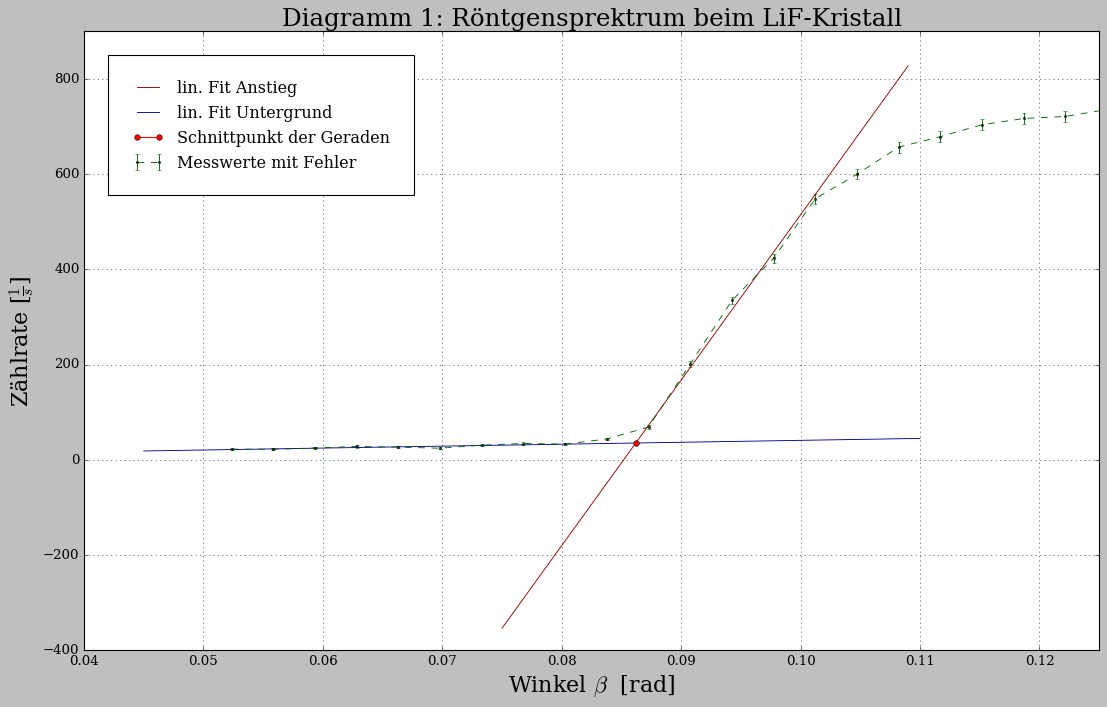

In [5]:
#Plot der Messdaten
plt.errorbar(beta1, counts1, yerr=counts1_err,linewidth=0.8,linestyle='--',marker='o',markersize=2,color='darkgreen',label='Messwerte mit Fehler')
plt.plot(np.linspace(0.075,0.109,2),linear(np.linspace(0.075,0.109,2),*popt1),linewidth=0.8,color='darkred',label='lin. Fit Anstieg')
plt.plot(np.linspace(0.045,0.11,2),linear(np.linspace(0.045,0.11,2),*popt2),linewidth=0.8,color='darkblue',label='lin. Fit Untergrund')
plt.xlabel(r'Winkel $ \beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
plt.title(r'Diagramm 1: Röntgensprektrum beim LiF-Kristall', size=22)
plt.xlim(0.04,0.125)
plt.ylim(-400,900)
plt.grid(ls='dotted')

#Einzeichnen des Schnittpunktes
plt.plot(beta0, linear(beta0,*popt1),color = 'red',marker='o',mec='black',markersize=5,label='Schnittpunkt der Geraden')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc=2)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V255Diagramm1.pdf', format='PDF')

In [6]:
#Güte des Fits des Anstiegs
chi_squared1=np.sum((linear(beta1[10:15],*popt1)-counts1[10:15])**2/counts1_err[10:15]**2)

#Freiheitsgrade
dof1=len(beta1[10:15])-2

chi_squared1_red=chi_squared1/dof1

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared1))
print('chi_squared_red= ' + str(chi_squared1_red))
print()

#Fitwahrscheinlichkeit
prob1=round(1-chi2.cdf(chi_squared1,dof1),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob1) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 10.8672662356
chi_squared_red= 3.62242207852

Die Fitwahrscheinlichkeit beträgt: 1.0 %


In [7]:
#Güte des Fits des Untergrunds
chi_squared2=np.sum((linear(beta1[:9],*popt2)-counts1[:9])**2/counts1_err[:9]**2)

#Freiheitsgrade
dof2=len(beta1[:9])-2

chi_squared2_red=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared2_red))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 6.15530587221
chi_squared_red= 0.879329410315

Die Fitwahrscheinlichkeit beträgt: 52.0 %


In [8]:
#Grenzwellenlänge aus beta0
d_LiF=201.4e-12 #m
d_LiF_err=0.05e-12

lambda_gr=2*d_LiF*np.sin(beta0)
lambda_gr_err=2*np.sqrt((d_LiF*np.cos(beta0)*beta0_err)**2+(d_LiF_err*np.sin(beta0))**2)

print('Daraus folgt mit der Bragg-Gleichung für die Grenzwellenlänge:')
print('lambda_gr = (' + str(lambda_gr) + ' +/- ' + str(lambda_gr_err) + ') m')

Daraus folgt mit der Bragg-Gleichung für die Grenzwellenlänge:
lambda_gr = (3.46789049918e-11 +/- 1.71757362031e-12) m


In [9]:
#Plancksches Wirkungsquantum aus Gl. (1)

e=1.6022e-19 #C
c=2.9979e8 #m/s
U0= 35e3 #V

h1=lambda_gr*e*U0/c
h1_err=h1*(lambda_gr_err/lambda_gr)

print('Für das Plancksche Wirkungsquantum h folgt:')
print('h = (' + str(h1) + ' +/- ' + str(h1_err) + ') Js')
print()

#Vergleich mit dem Literaturwert
h_lit=6.6261e-34 #Js

diff_h1=np.abs(h_lit-h1)
print('Der Vergleich mit dem Literaturwert liefert:')
print('∆h1 =(' + str(diff_h1) + ' +/- ' + str(h1_err) + ') Js')

Für das Plancksche Wirkungsquantum h folgt:
h = (6.48683730353e-34 +/- 3.21279481991e-35) Js

Der Vergleich mit dem Literaturwert liefert:
∆h1 =(1.39262696473e-35 +/- 3.21279481991e-35) Js


In [10]:
#mit dem Bragg'schen Gesetz folgt die Beziehung zwischen theta1 und theta2 zu sin(theta1)/sin(theta2)=n1/n2=1/2
theta2=np.arcsin(2*np.sin(beta0))
theta2_err=2*np.cos(beta0)*(2*np.cos(2*beta0)-1)**(-0.5)*beta0_err
print('Das Spektrum zweiter Ordnung setzt bei folgendem Winkel ein:')
print('theta2 = (' + str(theta2) + ' +/- ' + str(theta2_err) + ') rad')

Das Spektrum zweiter Ordnung setzt bei folgendem Winkel ein:
theta2 = (0.173051633923 +/- 0.00865737116166) rad


#### b) Analyse der $K_\alpha$ und $K_\beta$ Linien

##### erste Ordnung

In [11]:
#Importieren der Messdaten der ersten K-Ordnung 
beta2, counts2=np.loadtxt('Messdaten/V255Messdaten_LiF2.txt',skiprows=1, usecols=(0,1), unpack=True)
beta2=beta2*(2*np.pi)/360
#statistischer Fehler der Zählrate
counts2_err=np.sqrt(counts2)/np.sqrt(20)

In [12]:
#Fit der Messdaten
popt3,pcov3=curve_fit(gauß_optimiert,beta2,counts2,sigma=counts2_err,p0=[7000,2000,1000,0.155,0.003,2300,0.178,0.003])

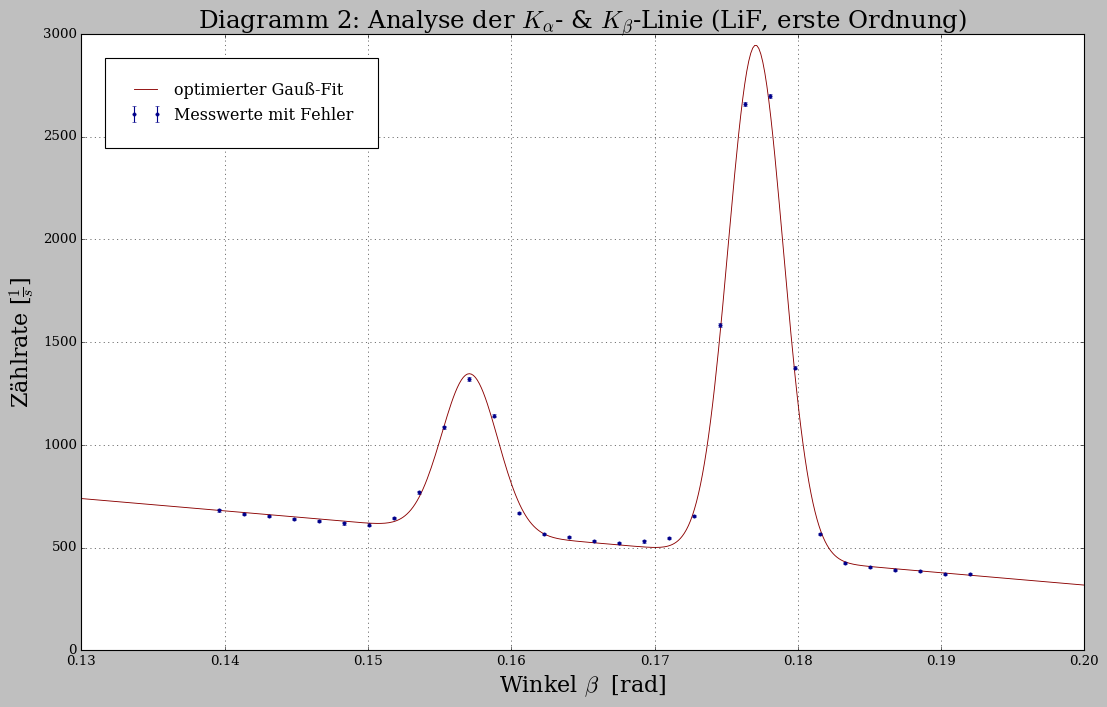

In [13]:
#Plot der Messdaten
plt.errorbar(beta2, counts2, yerr=counts2_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(np.linspace(0.13,0.20,500),gauß_optimiert(np.linspace(0.13,0.20,500),*popt3),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $ \beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
plt.title(r'Diagramm 2: Analyse der $K_\alpha$- & $K_\beta$-Linie (LiF, erste Ordnung)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc=2)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V255Diagramm2.pdf', format='PDF')

In [14]:
#Güte des Fits 
chi_squared3=np.sum((gauß_optimiert(beta2,*popt3)-counts2)**2/counts2_err**2)

#Freiheitsgrade
dof3=len(beta2)-8

chi_squared3_red=chi_squared3/dof3

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared3))
print('chi_squared_red= ' + str(chi_squared3_red))
print()

#Fitwahrscheinlichkeit
prob3=round(1-chi2.cdf(chi_squared3,dof3),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob3) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 485.914496537
chi_squared_red= 21.1267172407

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [15]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('Für die erste Ordnung folgen die berechneten Winkel:')
print('K_beta_1: (' + str(popt3[3]) + ' +/- ' + str(popt3[4]) + ') rad' )
print('K_alpha_1: (' + str(popt3[6]) + ' +/- ' + str(popt3[7]) + ') rad' )

Für die erste Ordnung folgen die berechneten Winkel:
K_beta_1: (0.157100945897 +/- 0.00194791595699) rad
K_alpha_1: (0.177066278546 +/- 0.00191793009895) rad


In [16]:
#Wellenlänge analog wie bei der Bestimmung der Grenzwellenlänge
lambdaK_beta1=2*d_LiF*np.sin(popt3[3])
lambdaK_beta1_err=2*np.sqrt((d_LiF*np.cos(popt3[3])*popt3[4])**2+(d_LiF_err*np.sin(popt3[3]))**2)

lambdaK_alpha1=2*d_LiF*np.sin(popt3[6])
lambdaK_alpha1_err=2*np.sqrt((d_LiF*np.cos(popt3[6])*popt3[7])**2+(d_LiF_err*np.sin(popt3[6]))**2)

print('Daraus ergeben sich die korrespondierenden Wellenlängen')
print('K_beta_1: (' + str(lambdaK_beta1) + ' +/- ' + str(lambdaK_beta1_err) + ') m' )
print('K_alpha_1: (' + str(lambdaK_alpha1) + ' +/- ' + str(lambdaK_alpha1_err) + ') m' )

Daraus ergeben sich die korrespondierenden Wellenlängen
K_beta_1: (6.30202817729e-11 +/- 7.75115867516e-13) m
K_alpha_1: (7.09501924704e-11 +/- 7.60667267375e-13) m


##### Halbwersbreite für $K_\alpha$ in erster Ordnung

In [17]:
#Wir wissen: FWHM = 2*sqrt(2*ln(2))*sigma (=2.35482*sigma=2.4*sigma)

FWHM_K_alpha1=2*np.sqrt(2*np.log(2))*popt3[7]
FWHM_K_alpha1_err=2*np.sqrt(2*np.log(2))*pcov3[7,7]**0.5

print('Aus dem Fit folgt für die Halbwertsbreite: ')
print('FWHM_K_alpha1 = (' + str(FWHM_K_alpha1) + ' +/- ' + str(FWHM_K_alpha1_err) + ') 1/s' )

Aus dem Fit folgt für die Halbwertsbreite: 
FWHM_K_alpha1 = (0.00451638024199 +/- 6.84564782839e-05) 1/s


##### zweite Ordnung

In [18]:
#Importieren der Messdaten der zweiten K-Ordnung 
beta3, counts3=np.loadtxt('Messdaten/V255Messdaten_LiF3.txt',skiprows=1, usecols=(0,1), unpack=True)
beta3=beta3*(2*np.pi)/360
#statistischer Fehler der Zählrate
counts3_err=np.sqrt(counts3)/np.sqrt(20)

In [19]:
#Fit der Messdaten
popt4,pcov4=curve_fit(gauß_optimiert,beta3,counts3,sigma=counts3_err,p0=[100,300,40,0.308,0.002,200,0.35,0.002])

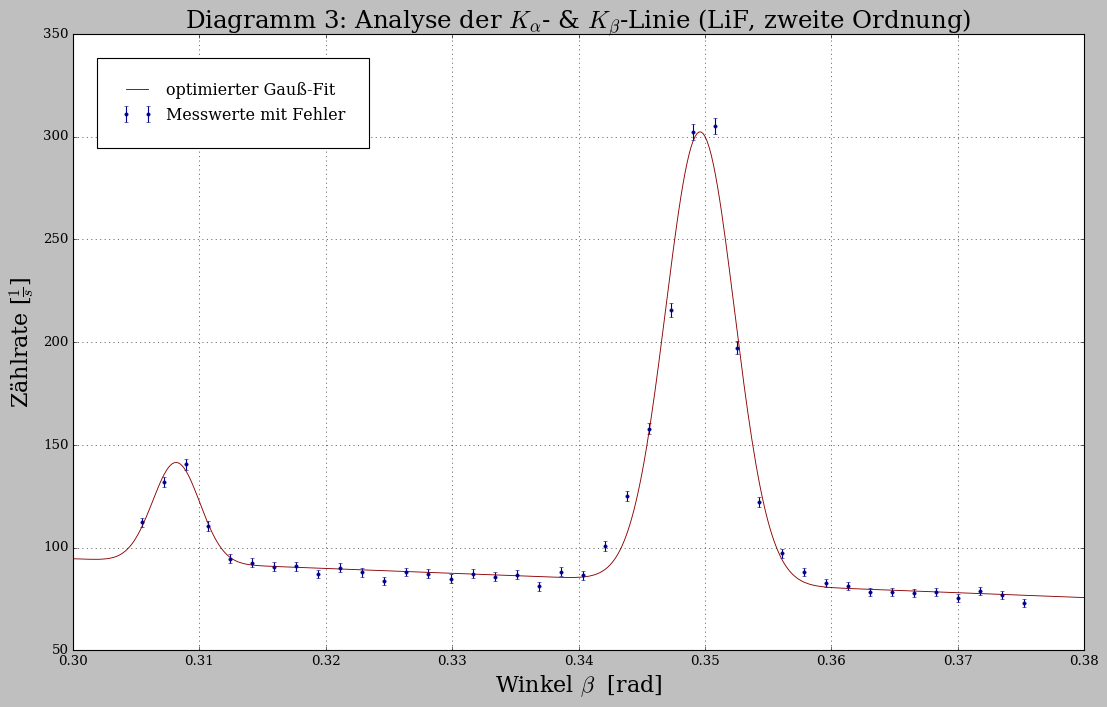

In [20]:
#Plot der Messdaten
plt.errorbar(beta3, counts3, yerr=counts3_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(np.linspace(0.30,0.38,500),gauß_optimiert(np.linspace(0.30,0.38,500),*popt4),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $ \beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
plt.title(r'Diagramm 3: Analyse der $K_\alpha$- & $K_\beta$-Linie (LiF, zweite Ordnung)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc=2)
#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V255Diagramm3.pdf', format='PDF')

In [21]:
#Güte des Fits 
chi_squared4=np.sum((gauß_optimiert(beta3,*popt4)-counts3)**2/counts3_err**2)

#Freiheitsgrade
dof4=len(beta3)-8

chi_squared4_red=chi_squared4/dof4

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared4))
print('chi_squared_red= ' + str(chi_squared4_red))
print()

#Fitwahrscheinlichkeit
prob4=round(1-chi2.cdf(chi_squared4,dof4),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob4) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 213.663976793
chi_squared_red= 6.47466596343

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [22]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('Für die zweite Ordnung folgen die berechneten Winkel:')
print('K_beta_2: (' + str(popt4[3]) + ' +/- ' + str(popt4[4]) + ') rad' )
print('K_alpha_2: (' + str(popt4[6]) + ' +/- ' + str(popt4[7]) + ') rad' )

Für die zweite Ordnung folgen die berechneten Winkel:
K_beta_2: (0.308173630924 +/- 0.00186487728921) rad
K_alpha_2: (0.349613321263 +/- 0.00271704498428) rad


In [23]:
#Wellenlänge analog wie bei der Bestimmung der Grenzwellenlänge (allerdings Ordnung 2, deshalb Vorfaktor=1, da 0.5*2)
lambdaK_beta2=d_LiF*np.sin(popt4[3])
lambdaK_beta2_err=np.sqrt((d_LiF*np.cos(popt4[3])*popt4[4])**2+(d_LiF_err*np.sin(popt4[3]))**2)

lambdaK_alpha2=d_LiF*np.sin(popt4[6])
lambdaK_alpha2_err=np.sqrt((d_LiF*np.cos(popt4[6])*popt4[7])**2+(d_LiF_err*np.sin(popt4[6]))**2)

print('Daraus ergeben sich die korrespondierenden Wellenlängen')
print('K_beta_2: (' + str(lambdaK_beta2) + ' +/- ' + str(lambdaK_beta2_err) + ') m' )
print('K_alpha_2: (' + str(lambdaK_alpha2) + ' +/- ' + str(lambdaK_alpha2_err) + ') m' )

Daraus ergeben sich die korrespondierenden Wellenlängen
K_beta_2: (6.10884095521e-11 +/- 3.58213279526e-13) m
K_alpha_2: (6.898645764e-11 +/- 5.14394541481e-13) m


#### c) Bestimmung der Einsatzspannung $U$ und erneute Bestimmung von $h$

In [24]:
#eingestellte Beschleunigungsspannungen 
U=np.linspace(20,35,16)

#gemessene Zählraten
counts4=np.array([1.55,2.50,3.40,8.25,60.10,149.2,223.3,286.3,348.8,411.1,467.3,519.8,573.2,632.5,668.8,720.0])
counts4_err=np.sqrt(counts4)/np.sqrt(20)

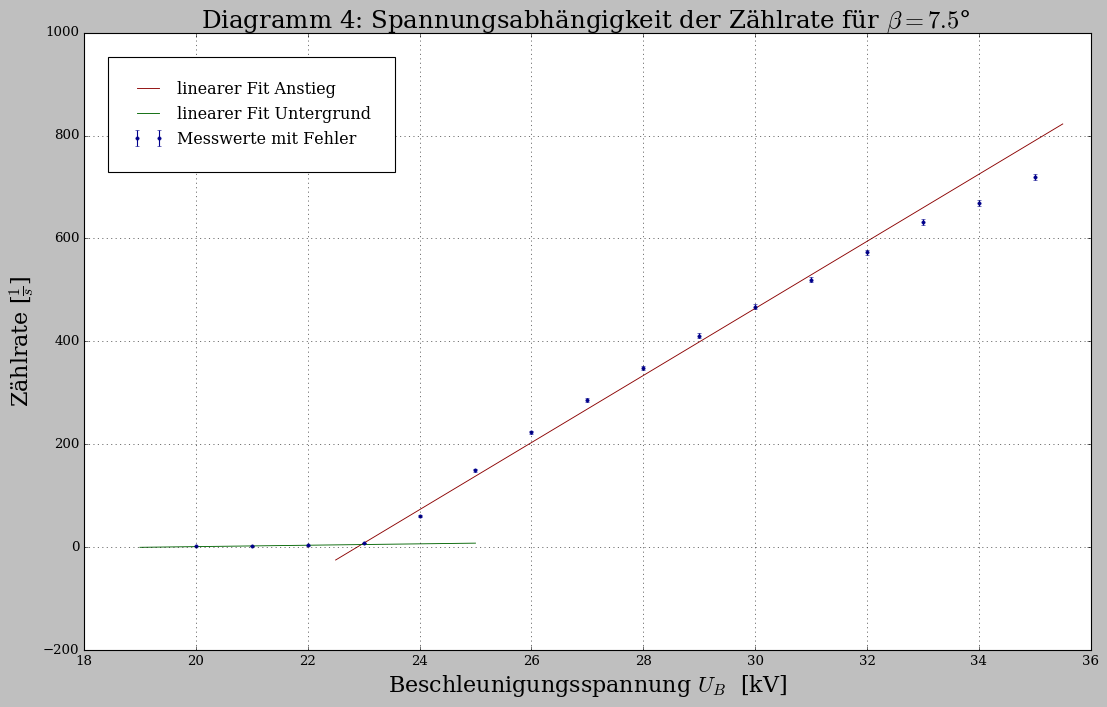

In [25]:
#Erneut linearer Fit 

#linearer Anstieg
popt5,pcov5=curve_fit(linear,U[4:-2],counts4[4:-2],sigma=counts4_err[4:-2])

#Untergrund
popt6,pcov6=curve_fit(linear,U[:4],counts4[:4],sigma=counts4_err[:4])

#Plot der Messdaten
plt.errorbar(U, counts4, yerr=counts4_err,linewidth=1,linestyle=' ',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.xlabel(r'Beschleunigungsspannung $U_B$  [kV]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
plt.title(r'Diagramm 4: Spannungsabhängigkeit der Zählrate für $\beta=7.5$° ', size=22)
plt.grid(ls='dotted')
#Fit linearer Anstieg
plt.plot(np.linspace(22.5,35.5,2),linear(np.linspace(22.5,35.5,2),*popt5),linewidth=0.8,color='darkred',label='linearer Fit Anstieg')

#Fit Untergrund
plt.plot(np.linspace(19,25,2),linear(np.linspace(19,24,2),*popt6),linewidth=0.8,color='darkgreen',label='linearer Fit Untergrund')


plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc=2)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V255Diagramm4.pdf', format='PDF')

In [26]:
#Güte des Fits des Anstiegs
chi_squared5=np.sum((linear(U[4:-2],*popt5)-counts4[4:-2])**2/counts4_err[4:-2]**2)

#Freiheitsgrade
dof5=len(counts4[4:-2])-2

chi_squared5_red=chi_squared5/dof5

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared5))
print('chi_squared_red= ' + str(chi_squared5_red))
print()

#Fitwahrscheinlichkeit
prob5=round(1-chi2.cdf(chi_squared5,dof5),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob5) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 192.433932675
chi_squared_red= 24.0542415844

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [27]:
#Güte des Fits des Untergrundes
chi_squared6=np.sum((linear(U[:4],*popt6)-counts4[:4])**2/counts4_err[:4]**2)

#Freiheitsgrade
dof6=len(counts4[:4])-2

chi_squared6_red=chi_squared6/dof6

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared6))
print('chi_squared_red= ' + str(chi_squared6_red))
print()

#Fitwahrscheinlichkeit
prob6=round(1-chi2.cdf(chi_squared6,dof6),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob6) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 20.3438504399
chi_squared_red= 10.1719252199

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [28]:
#Schnittpunkt der beiden Geraden ergibt Spannungsgrenze
UE=(popt6[1]-popt5[1])/(popt5[0]-popt6[0])
UE_err=np.sqrt(pcov6[1,1]/(popt5[0]-popt6[0])**2+pcov5[1,1]/(popt5[0]-popt6[0])**2+((popt6[1]-popt5[1])*pcov5[0,0]**0.5/(popt5[0]-popt6[0])**2)**2+((popt6[1]-popt5[1])*pcov6[0,0]**0.5/(popt5[0]-popt6[0])**2)**2)

print('Für den Schnittpunkt der beiden Geraden und damit UE folgt:')
print('UE = ' + str(UE) + ' +/- ' + str(UE_err) + ' kV')

Für den Schnittpunkt der beiden Geraden und damit UE folgt:
UE = 22.9774108998 +/- 1.0983492299 kV


##### Bestimmung von $h$ aus $U_E$

In [29]:
#Wellenlänge für theta=7.5°
lambda_U=2*d_LiF*np.sin(7.5*(2*np.pi)/360)
lambda_U_err=2*d_LiF_err*np.sin(7.5*(2*np.pi)/360)

#Daraus folgt mit UE und Gl.(1):
h2=lambda_U*e*(UE*1e3)/c
h2_err=h2*np.sqrt((lambda_U_err/lambda_U)**2+(UE_err/UE)**2)

print('Wir erhalten aus der Bestimmung der Betriebsspannung:')
print('h = (' + str(h2) + ' +/- ' + str(h2_err) + ') Js')
print()

#Vergleich mit dem Literaturwert
diff_h2=np.abs(h_lit-h2)
print('Der Vergleich mit dem Literaturwert liefert:')
print('∆h1 =(' + str(diff_h2) + ' +/- ' + str(h2_err) + ') Js')

Wir erhalten aus der Bestimmung der Betriebsspannung:
h = (6.45636101652e-34 +/- 3.0862636443e-35) Js

Der Vergleich mit dem Literaturwert liefert:
∆h1 =(1.69738983481e-35 +/- 3.0862636443e-35) Js


### Teil 2: Messung des Röntgensprektrums mit einem NaCl-Kristall 

#### Bestimmung der Lage der $K_\alpha$ und der $K_\beta$

In [30]:
#Importieren der Messdaten der Messung mit dem NaCl-Kristall
beta4, counts5=np.loadtxt('Messdaten/V255Messdaten_NaCl.txt',skiprows=1, usecols=(0,1), unpack=True)
beta4=beta4*(2*np.pi)/360
#statistischer Fehler der Zählrate
counts5_err=np.sqrt(counts5/5)

In [31]:
#Fit der Messdaten
mask1=np.all([beta4>0.095, beta4<0.142],axis=0)
popt7,pcov7=curve_fit(gauß_optimiert,beta4[mask1],counts5[mask1],sigma=counts5_err[mask1],p0=[-12500,2180,880,0.111,0.002,2310,0.1253,0.002])

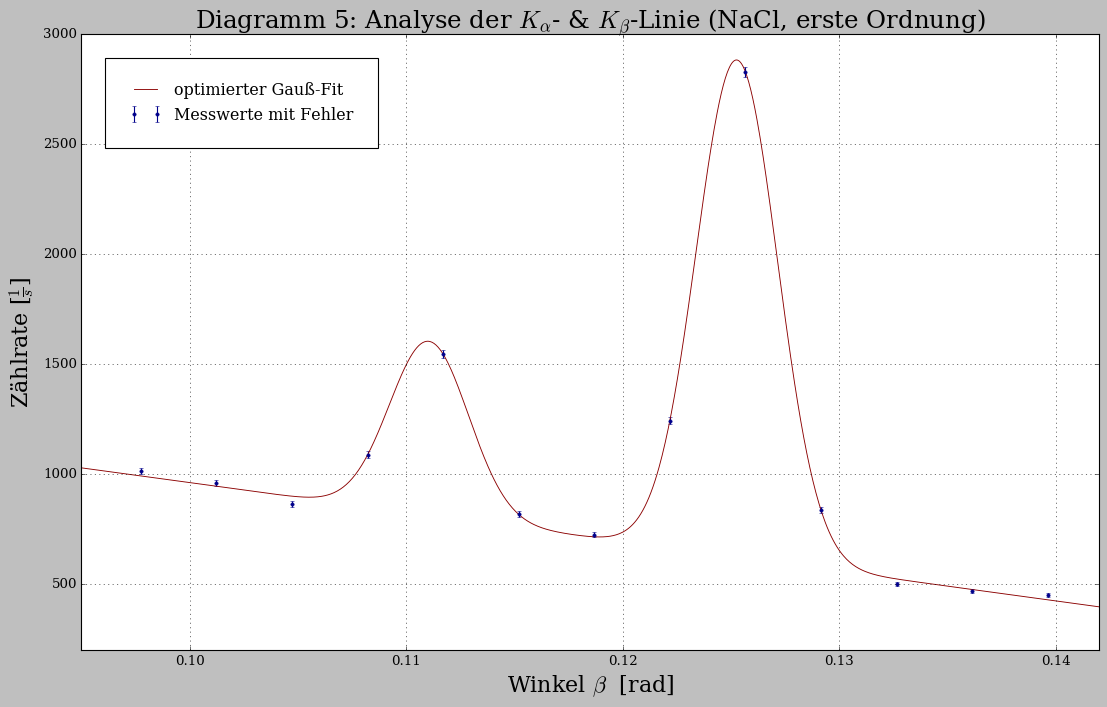

In [32]:
#Plot der Messdaten
plt.errorbar(beta4, counts5, yerr=counts5_err,linewidth=1,linestyle=' ',marker='.',color='darkblue',label='Messwerte mit Fehler')
x=np.linspace(0.095,0.142,1000)
plt.plot(x,gauß_optimiert(x,*popt7),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $\beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
plt.title(r'Diagramm 5: Analyse der $K_\alpha$- & $K_\beta$-Linie (NaCl, erste Ordnung)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc=2)
plt.xlim(0.095,0.142)
plt.ylim(200,3000)
#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V255Diagramm5.pdf', format='PDF')

In [33]:
#Güte des Fits 
chi_squared7=np.sum((gauß_optimiert(beta4[mask1],*popt7)-counts5[mask1])**2/counts5_err[mask1]**2)

#Freiheitsgrade
dof7=len(beta4[mask1])-8

chi_squared7_red=chi_squared7/dof7

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared7))
print('chi_squared_red= ' + str(chi_squared7_red))
print()

#Fitwahrscheinlichkeit
prob7=round(1-chi2.cdf(chi_squared7,dof7),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob7) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 22.2865513848
chi_squared_red= 4.45731027696

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [34]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('Für die erste Ordnung folgen die berechneten Winkel:')
print('K_beta_1: (' + str(popt7[3]) + ' +/- ' + str(popt7[4]) + ') rad' )
print('K_alpha_1: (' + str(popt7[6]) + ' +/- ' + str(popt7[7]) + ') rad' )

Für die erste Ordnung folgen die berechneten Winkel:
K_beta_1: (0.11104772107 +/- 0.00182468114062) rad
K_alpha_1: (0.125270544814 +/- 0.00187816700007) rad


##### zweite Ordnung

In [35]:
#Fit der Messdaten
mask2=np.all([beta4>0.21, beta4<0.27],axis=0)
popt8,pcov8=curve_fit(gauß_optimiert,beta4[mask2],counts5[mask2],sigma=counts5_err[mask2],p0=[-700,280,200,0.225,0.002,650,0.2538,0.002])

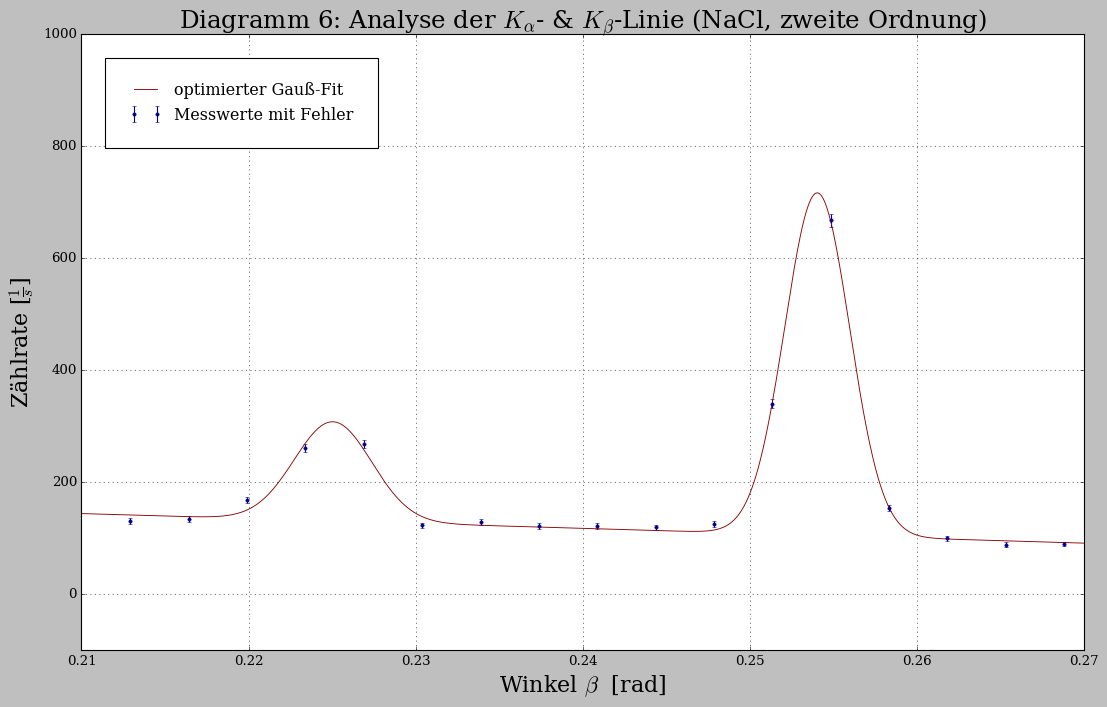

In [36]:
#Plot der Messdaten
plt.errorbar(beta4, counts5, yerr=counts5_err,linewidth=1,linestyle=' ',marker='.',color='darkblue',label='Messwerte mit Fehler')
x=np.linspace(0.21,0.27,1000)
plt.plot(x,gauß_optimiert(x,*popt8),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $\beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
plt.title(r'Diagramm 6: Analyse der $K_\alpha$- & $K_\beta$-Linie (NaCl, zweite Ordnung)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc=2)
plt.xlim(0.21,0.27)
plt.ylim(-100,1000)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V255Diagramm6.pdf', format='PDF')

In [37]:
#Güte des Fits 
chi_squared8=np.sum((gauß_optimiert(beta4[mask2],*popt8)-counts5[mask2])**2/counts5_err[mask2]**2)

#Freiheitsgrade
dof8=len(beta4[mask2])-8

chi_squared8_red=chi_squared8/dof8

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared8))
print('chi_squared_red= ' + str(chi_squared8_red))
print()

#Fitwahrscheinlichkeit
prob8=round(1-chi2.cdf(chi_squared8,dof8),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob8) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 39.6531635443
chi_squared_red= 4.40590706047

Die Fitwahrscheinlichkeit beträgt: 0.0 %


In [38]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('Für die zweite Ordnung folgen die berechneten Winkel:')
print('K_beta_2: (' + str(popt8[3]) + ' +/- ' + str(popt8[4]) + ') rad' )
print('K_alpha_2: (' + str(popt8[6]) + ' +/- ' + str(popt8[7]) + ') rad' )

Für die zweite Ordnung folgen die berechneten Winkel:
K_beta_2: (0.225045838858 +/- 0.00231806316443) rad
K_alpha_2: (0.254020602594 +/- 0.00194374992707) rad


#### Gitterkonstante von NaCl

In [39]:
#Wellenlängen von K_alpha und K_beta aus Aufgabe 1b) (sowohl erste, als auch zweite Ordnung)
K_a1=lambdaK_alpha1
K_b1=lambdaK_beta1
K_a2=lambdaK_alpha2
K_b2=lambdaK_beta2

lam=np.array([K_a1,K_b1,K_a2,K_b2])
lam_err=np.array([lambdaK_alpha1_err,lambdaK_beta1_err,lambdaK_alpha2_err,lambdaK_beta2_err])

#mit dem Bragg-Gesetz gilt für die Gitterkonstante: a=2*d=n*lam/sin(theta)
n=np.array([1,1,2,2])
theta=np.array([popt7[6],popt7[3],popt8[6],popt8[3]])
theta_err=np.array([popt7[7],popt7[4],popt8[7],popt8[4]])
a=n*lam/np.sin(theta)
a_err=a*np.sqrt((lam_err/lam)**2+(theta_err/np.tan(theta))**2)

a_mean=np.mean(a)
a_mean_err=1/4*np.sum(a_err**2)**0.5
a_mean_std=1/np.sqrt(len(a))*np.std(a)

print('Es ergibt sich eine (gemittelte) Gitterkonstante von:')
print('a_mean = (',round(a_mean*1e12,2),' +/- ',round(a_mean_err*1e12,2),'(sys.) +/- ',round(a_mean_std*1e12,2),'(stat.))pm')

Es ergibt sich eine (gemittelte) Gitterkonstante von:
a_mean = ( 558.27  +/-  4.47 (sys.) +/-  5.01 (stat.))pm


#### Bestimmung der Avodagadro-Konstante $N_A$

In [40]:
#Dichte NaCl
rho=2.164e3 #kg/(m**3)
rho_err=0.0005e3

#Molekulargewicht NaCl
M=58.44e-3 #kg
M_err=0.005e-3

#Nach Skript gilt: N_A=0.5*M/(rho*d**3)=4*M/(rho*a**3)
N_A=4*M/(rho*a_mean**3)
N_A_err=N_A*np.sqrt((M_err/M)**2+(rho_err/rho)**2+(3*a_mean_err/a_mean)**2)
N_A_std=N_A*3*a_mean_std/a_mean

print('Die Avogadro-Zahl ergibt sich zu:')
print('N_A = (',round(N_A*1e-23,4),' +/- ',round(N_A_err*1e-23,4),' +/- ',round(N_A_std*1e-23,4),') 10^23 1/mol')
print()

#Vergleich mit dem Literaturwert
N_A_lit=6.0221e23 #1/mol

diff_N_A=np.abs(N_A_lit-N_A)
print('Der Vergleich mit dem Literaturwert liefert:')
print('∆N_A =(' + str(diff_N_A) + ' +/- ' + str(N_A_err)+ '(sys.) +/- ' + str(N_A_std) + '(stat.)) 1/mol')
print('sigma(sys.)=',round(diff_N_A/N_A_err,2),'; sigma(stat.)=',round(diff_N_A/N_A_std,2))

Die Avogadro-Zahl ergibt sich zu:
N_A = ( 6.2084  +/-  0.149  +/-  0.1671 ) 10^23 1/mol

Der Vergleich mit dem Literaturwert liefert:
∆N_A =(1.86277306296e+22 +/- 1.48977414787e+22(sys.) +/- 1.67062241605e+22(stat.)) 1/mol
sigma(sys.)= 1.25 ; sigma(stat.)= 1.12
